<a href="https://colab.research.google.com/github/leosmundim/modelo_gressao_linear/blob/main/Modelo_Regressao_Linear_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import statsmodels.formula.api as sm
import scipy.stats as stats

In [ ]:
df = pd.read_excel('/content/base_tcc.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           37 non-null     datetime64[ns]
 1   INAD           37 non-null     float64       
 2   Empregoformal  37 non-null     float64       
 3   IGP_M          37 non-null     float64       
 4   IPCA           37 non-null     float64       
 5   PIB            37 non-null     float64       
 6   Renda_Media    37 non-null     float64       
 7   Salario        37 non-null     int64         
 8   SELIC          37 non-null     float64       
 9   Taxa_Juros     37 non-null     float64       
 10  desemprego     37 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 3.3 KB


## **Analisando Correlações**

In [ ]:
#Correlação INAD (var resposta) vs Demais (var. explicativas)
df[df.columns[1:]].corr()['INAD'][:]

INAD             1.000000
Empregoformal   -0.431075
IGP_M           -0.067201
IPCA            -0.235699
PIB             -0.613913
Renda_Media     -0.218630
Salario         -0.508479
SELIC           -0.174612
Taxa_Juros       0.162496
desemprego       0.296769
Name: INAD, dtype: float64

In [ ]:
#Correlação INAD vs Empregoformal, IGP_M, IPCA e INAD
df[['Empregoformal', 'IGP_M', 'IPCA', 'INAD']].corr()['INAD'][:]

Empregoformal   -0.431075
IGP_M           -0.067201
IPCA            -0.235699
INAD             1.000000
Name: INAD, dtype: float64

In [ ]:
#Matriz correlação
corr = df.corr()
corr

,INAD,Empregoformal,IGP_M,IPCA,PIB,Renda_Media,Salario,SELIC,Taxa_Juros,desemprego
INAD,1.000000,-0.431075,-0.067201,-0.235699,-0.613913,-0.218630,-0.508479,-0.174612,0.162496,0.296769
Empregoformal,-0.431075,1.000000,0.277256,0.049336,0.876246,0.369198,0.869690,-0.625891,-0.825685,-0.646179
IGP_M,-0.067201,0.277256,1.000000,0.207862,0.144982,-0.031388,0.210688,-0.100957,-0.177340,-0.095504
IPCA,-0.235699,0.049336,0.207862,1.000000,0.054489,0.393734,0.166367,-0.025284,-0.084255,-0.388084
PIB,-0.613913,0.876246,0.144982,0.054489,1.000000,0.493459,0.742331,-0.452664,-0.722171,-0.636842
Renda_Media,-0.218630,0.369198,-0.031388,0.393734,0.493459,1.000000,0.265826,-0.230393,-0.388630,-0.848740
Salario,-0.508479,0.869690,0.210688,0.166367,0.742331,0.265826,1.000000,-0.610128,-0.788920,-0.485661
SELIC,-0.174612,-0.625891,-0.100957,-0.025284,-0.452664,-0.230393,-0.610128,1.000000,0.922775,0.319007
Taxa_Juros,0.162496,-0.825685,-0.177340,-0.084255,-0.722171,-0.388630,-0.788920,0.922775,1.000000,0.517600
desemprego,0.296769,-0.646179,-0.095504,-0.388084,-0.636842,-0.848740,-0.485661,0.319007,0.517600,1.000000


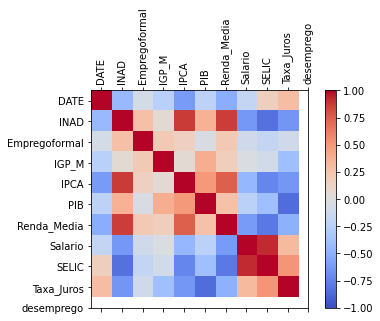

In [ ]:
#Gráfico matriz correlação
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [ ]:
#Teste T-student
result = stats.ttest_ind(df['INAD'],df['Renda_Media'])

In [ ]:
result

Ttest_indResult(statistic=-76.00176720813933, pvalue=1.6802324613106954e-70)

In [ ]:
result = stats.ttest_ind(df['INAD'],df['Renda_Media'])

In [ ]:
#https://analyticsindiamag.com/understand-the-significance-of-t-test-and-p-value-using-python/

#https://www.alura.com.br/conteudo/estatistica-testes-hipotestes

# **Analisando se as variáveis seguem distribuição normal**

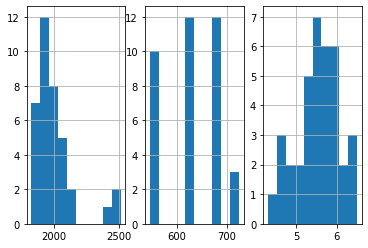

In [ ]:
#Analisando se a variável é uma distribuição normal visualmente
fig, axes = plt.subplots(1,3)
df['Renda_Media'].hist(ax = axes[0])
df['Salario'].hist(ax=axes[1])
df['desemprego'].hist(ax=axes[2])
plt.show()

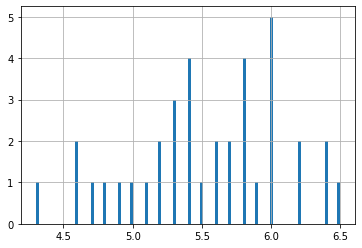

In [ ]:
#Analisando se a variável é uma distribuição normal visualmente mais detalhe
df['desemprego'].hist(bins=100)


In [ ]:
#Testando formalmente
#onde, p-value < 5% descarta H0. H0 afirma que segue distribuição normal. Se p-value < 0,05, não é uma distribuição normal
stat_test, p_valor = normaltest(df['desemprego'])

print(f"p_value: {p_valor:.4f} p_valor <= 0.05 ?: {p_valor<=0.05}")
#H0 é a hipótese de que a amostra segue uma dist normal. P_valor < 5% rejeita H0
#nesse caso, desemprego segue uma distribuicao normal


p_value: 0.6138 p_valor <= 0.05 ?: False


In [ ]:
#Teste de normalidade Shapiro-Wilk
#p-valor > 0.05 é uma distribuição normal
shapiroTest, p_valor_shapiro = stats.shapiro(df['desemprego'])
print("p-value shapiro:", p_valor_shapiro)

p-value shapiro: 0.6165697574615479


## **Verificando Dispersão dos Dados em Relação a variável resposta**

Text(0.5, 1.1, 'Dispersão entre variáveis')

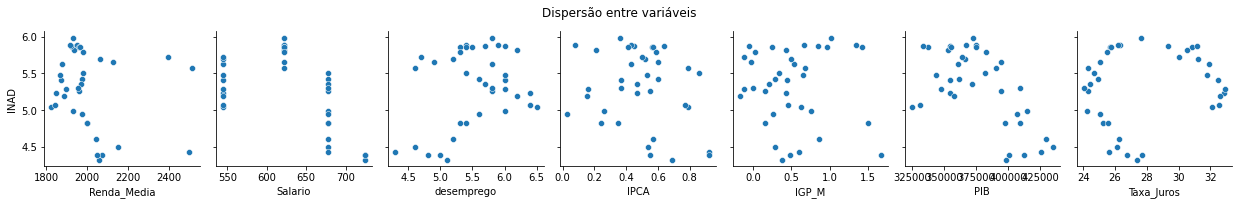

In [ ]:
import seaborn as sns
ax = sns.pairplot(df, y_vars='INAD', x_vars=['Renda_Media','Salario','desemprego','IPCA', 'IGP_M', 'PIB','Taxa_Juros'])
ax.fig.suptitle('Dispersão entre variáveis', y=1.1)

## **Criando Modelo de RegressãoLinear MQO**

In [ ]:
#https://neylsoncrepalde.github.io/2018-02-25-regressao-linear-python/
#Regressao Linear MQO - Mínimos Quadrados Ordinários
#import statsmodels.formula.api as sm

reg = sm.ols(formula = 'INAD~Empregoformal+IGP_M+IPCA+PIB+Renda_Media+Salario+SELIC+Taxa_Juros+desemprego', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   INAD   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     21.69
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           3.82e-10
Time:                        23:09:21   Log-Likelihood:                 11.875
No. Observations:                  37   AIC:                            -3.750
Df Residuals:                      27   BIC:                             12.36
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.7866      8.146      0.833

In [ ]:
#Retira RENDA_MEDIA com p-valor alto
reg = sm.ols(formula = 'INAD~Empregoformal+IGP_M+IPCA+PIB+Salario+SELIC+Taxa_Juros+desemprego', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   INAD   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     25.28
Date:                Sat, 21 May 2022   Prob (F-statistic):           7.33e-11
Time:                        20:16:23   Log-Likelihood:                 11.861
No. Observations:                  37   AIC:                            -5.723
Df Residuals:                      28   BIC:                             8.775
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6054      5.598      1.359

In [ ]:
#Retira EMPREGO_FORMAL com p-valor alto
reg = sm.ols(formula = 'INAD~IGP_M+IPCA+PIB+Salario+SELIC+Taxa_Juros+desemprego', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   INAD   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sat, 21 May 2022   Prob (F-statistic):           1.31e-11
Time:                        20:18:34   Log-Likelihood:                 11.825
No. Observations:                  37   AIC:                            -7.650
Df Residuals:                      29   BIC:                             5.238
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7944      2.371      3.709      0.0

In [ ]:
#Retira PIB com p-valor alto
reg = sm.ols(formula = 'INAD~IGP_M+IPCA+Salario+SELIC+Taxa_Juros+desemprego', data=df).fit()
print(reg.summary())

#R2 Ajustado mostra o quão o modelo explica o comportamento de Y (INAD)
#F - Statistic menor que 1 indicaque a amostra é estatisticamente válida
#p-value (p>|t|) maior que 0.05 descarta a variável por ela não ser significante no modelo

                            OLS Regression Results                            
Dep. Variable:                   INAD   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     31.93
Date:                Sat, 21 May 2022   Prob (F-statistic):           9.74e-12
Time:                        20:20:37   Log-Likelihood:                 9.8774
No. Observations:                  37   AIC:                            -5.755
Df Residuals:                      30   BIC:                             5.522
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2403      1.350      3.881      0.0

## **Verificando integridade dos resultados**

(array([4., 6., 5., 3., 3., 2., 7., 3., 2., 2.]),
 array([-0.26611245, -0.2052045 , -0.14429654, -0.08338859, -0.02248063,
         0.03842732,  0.09933528,  0.16024323,  0.22115119,  0.28205914,
         0.3429671 ]),
 <a list of 10 Patch objects>)

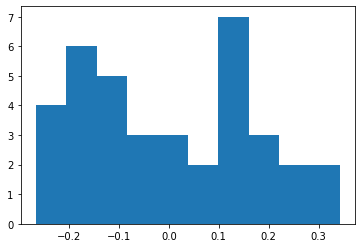

In [ ]:
#VERIFICANDO DIST DOS RESIDUOS
inad_calc = reg.predict()
residuo = df['INAD'] - inad_calc
plt.hist(residuo)

In [ ]:
#Teste se os erros seguem distribuição normal p-value > 5%
normaltest(residuo)

NormaltestResult(statistic=6.902404931473519, pvalue=0.03170748627972158)

In [ ]:
int(residuo.mean()) #a média dos resíduos deve ser igual a 0

-1.3961684661242888e-12

In [ ]:
#Média dos valores estimados deve ser igual ao dos valores reais
print("Média INAD Real: ", df['INAD'].mean())
print("Média INAD Modelo", inad_calc.mean())

Média INAD Real:  5.317027027027026
Média INAD Modelo 5.317027027028424


## **Gráfico comparativo INAD Real vs INAD Modelo**

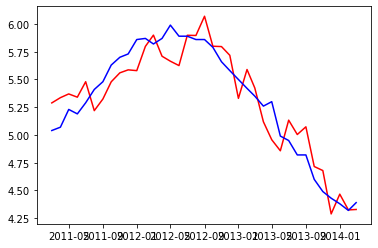

In [ ]:
#Gráfico com backtest do modelo
plt.plot(df['DATE'],inad_calc, color = 'red', label = 'INAD Modelo')
plt.plot(df['DATE'],df['INAD'], color = 'blue', label = 'INAD Real')